In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
from pathlib import Path
import joblib

project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

In [2]:
from src.Bayesian import *
from src.Bayesian.problems.config import config_fgt
from src.Bayesian.problems import *
from src.Bayesian.utils.optimizer import Optimizer, ConstantDict
from src.Bayesian.utils.model_evaluation import ModelEval

In [16]:
# Example module config
module_config = {
    "perception": (BasePerception, {}),
    "memory": (BaseMemory, {
        "personal_memory_range": {
            "gamma": (0.05, 1.0),
            "w0": (0.075, 0.15)
        },
        "param_resolution": 20
    }),
    "cluster": (PartitionCluster, {
        "transition_spec": [("random_4", "top_posterior"),
                            ("opp_random_4", "random")],
        "init_strategy": [(3, "random")]
    }),
}
optimizer = Optimizer(module_config, n_jobs=120)

# 导入数据
processed_path = Path(project_root) / 'data' / 'processed'
optimizer.prepare_data(processed_path / 'Task2_processed.csv')

In [4]:
iSub = 13
training_results = optimizer.optimize_params_with_subs_parallel(
    config_fgt, [iSub], 16, 5, 1000, stop_at=0.8)

Computing error for params: 100%|██████████| 1000/1000 [00:39<00:00, 25.33it/s]


In [ ]:
# save results
result_path = Path(project_root) / 'results' / 'Model_results'
os.makedirs(result_path, exist_ok=True)

optimizer.save_results(training_results, 'M7_PMH_training', result_path)

In [23]:
result_path = Path(project_root) / 'results' / 'Model_results_trainingtest' 
training_results = joblib.load(result_path / f'M7_PMH_training.joblib')

In [17]:
# iSub = 13
window_size_configs = {
    1: 8,
    2: 16,
    3: 16,
    4: 8,
    5: 16,
    6: 16,
    7: 8,
    8: 16,
    9: 16,
    10: 8,
    11: 16,
    12: 16,
    13: 8,
    14: 16,
    15: 16,
    16: 8,
    17: 16,
    18: 16,
    19: 8,
    20: 16,
    21: 16,
    22: 8,
    23: 16,
    24: 16}
test_results = optimizer.on_policy_with_subs_parallel(training_results,
    config_fgt, list(range(1, 25)), window_size_configs, 500)






Computing error for params: 100%|██████████| 500/500 [00:13<00:00, 35.87it/s]





Computing error for params: 100%|██████████| 500/500 [00:35<00:00, 14.02it/s]




Computing error for params: 100%|██████████| 500/500 [00:20<00:00, 24.23it/s]




Computing error for params: 100%|██████████| 500/500 [00:04<00:00, 112.47it/s]




Computing error for params: 100%|██████████| 500/500 [00:27<00:00, 17.87it/s]




Computing error for params: 100%|██████████| 500/500 [00:16<00:00, 30.44it/s]




Computing error for params: 100%|██████████| 500/500 [00:07<00:00, 68.95it/s]




Computing error for params: 100%|██████████| 500/500 [00:17<00:00, 28.50it/s]




Computing error for params: 100%|██████████| 500/500 [00:04<00:00, 100.12it/s]




Computing error for params: 100%|██████████| 500/500 [00:05<00:00, 93.01it/s]




Computing error for params: 100%|██████████| 500/500 [00:27<00:00, 18.49it/s]





Computing error for params: 100%|██████████| 500/500 [00:36<00:00, 13.80it/s]




Computi

In [22]:
optimizer.save_results(test_results, 'M7_PMH_test', result_path)

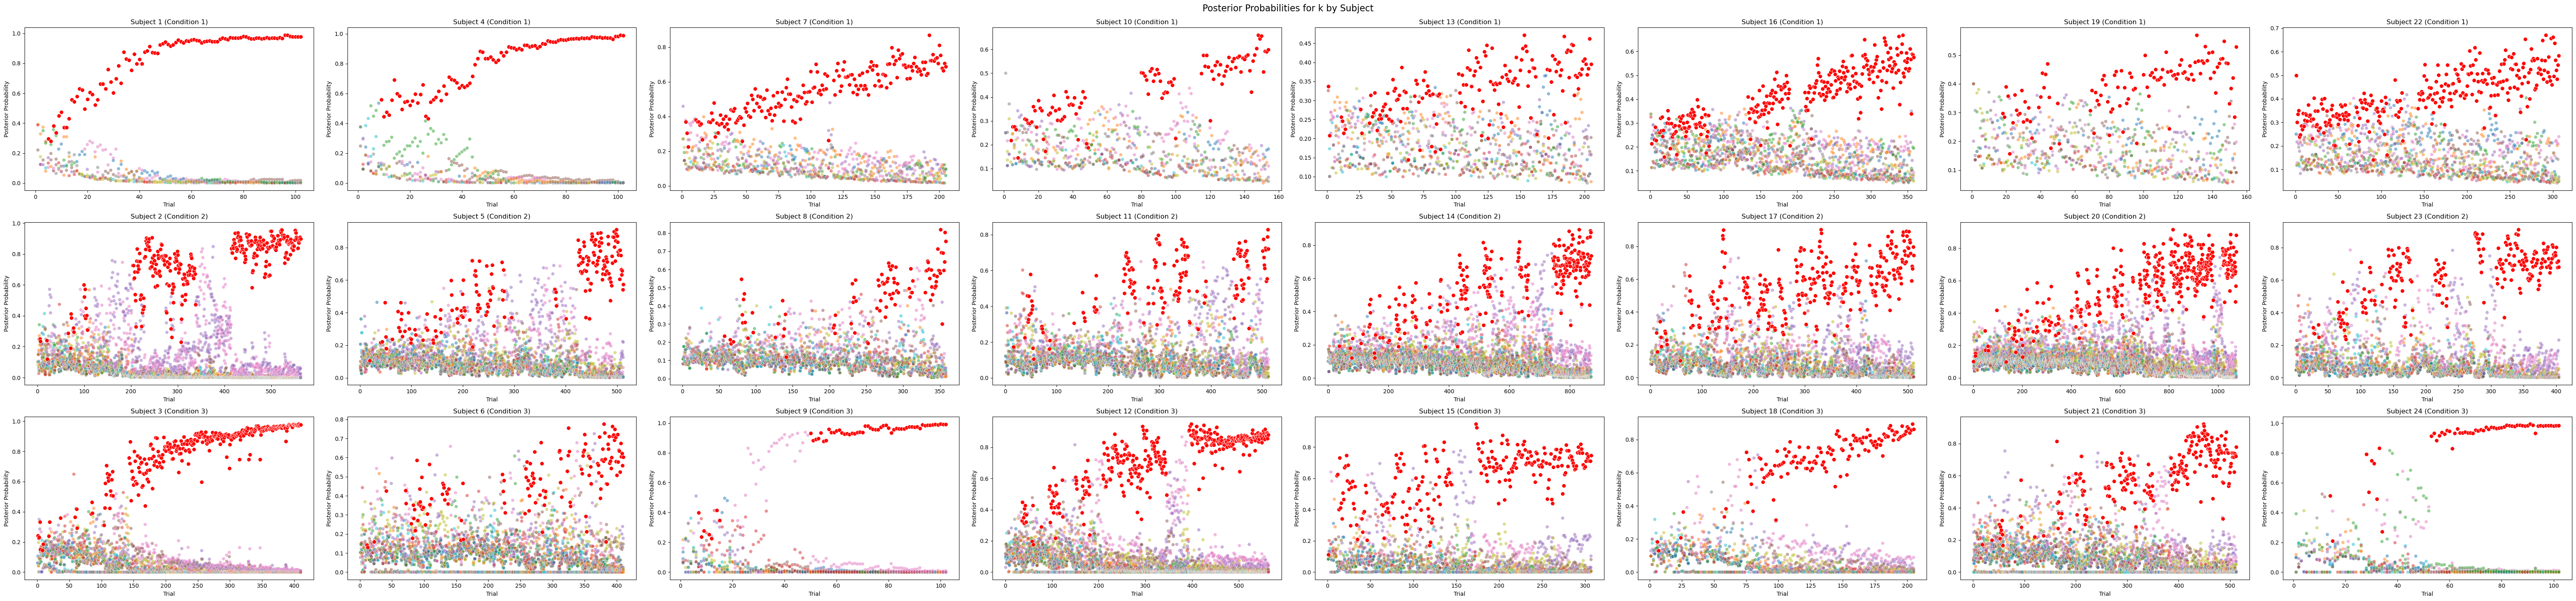

In [24]:
model_eval = ModelEval()
model_eval.plot_posterior_probabilities(training_results, list(range(1, 25)))

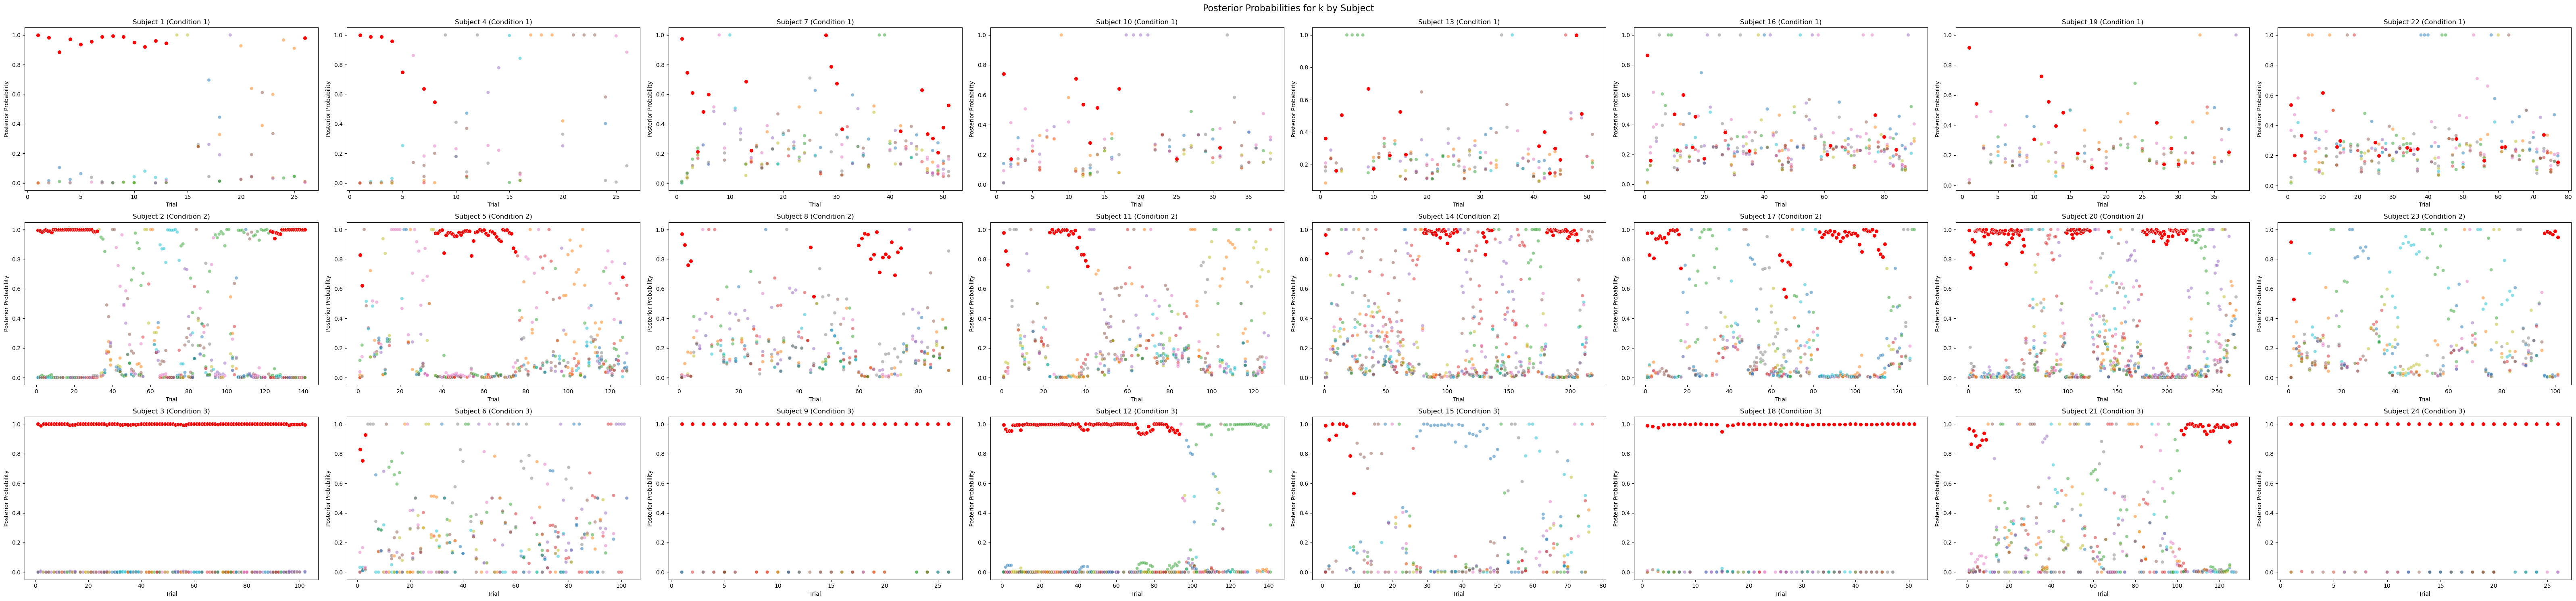

In [18]:
model_eval.plot_posterior_probabilities(test_results, list(range(1, 25)))

In [ ]:
optimizer.set_results(training_results)
prediction = optimizer.predict_with_subs_parallel(
    config_fgt, [iSub])

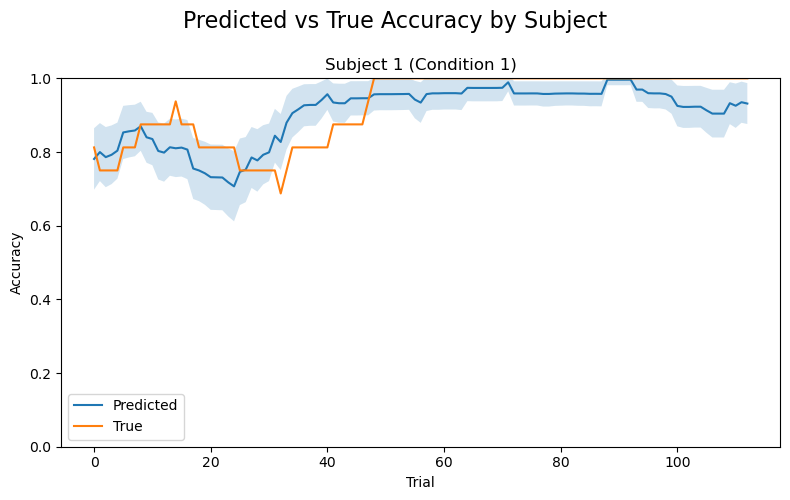

In [7]:
model_eval.plot_accuracy_comparison(prediction, [iSub])

In [8]:
from src.Bayesian.utils.oral_process import Oral_to_coordinate
oral_to_coordinate = Oral_to_coordinate()

learning_data = pd.read_csv(processed_path / 'Task2_processed.csv')
oral_hypo_hits = oral_to_coordinate.get_oral_hypo_hits(learning_data)

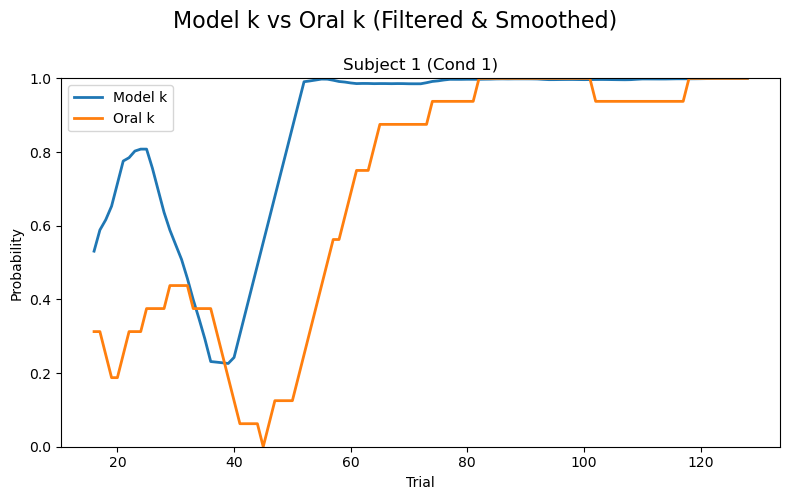

In [9]:
model_eval.plot_k_oral_comparison(results, oral_hypo_hits, [iSub])

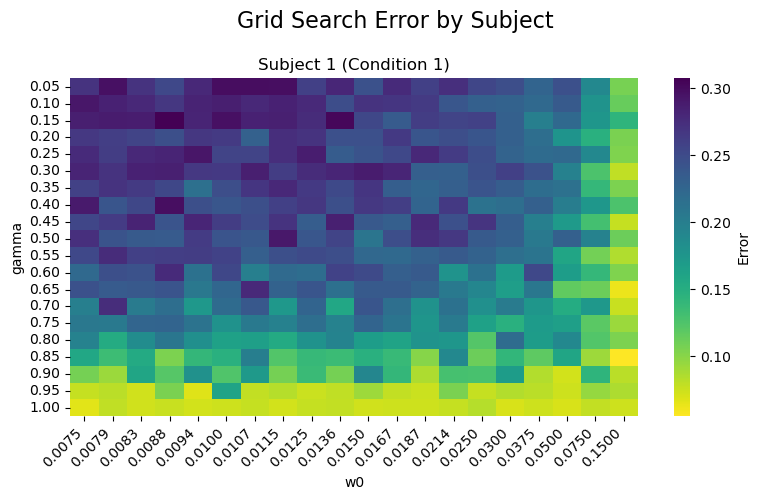

In [12]:
model_eval.plot_error_grids(results, fname=['gamma','w0'])

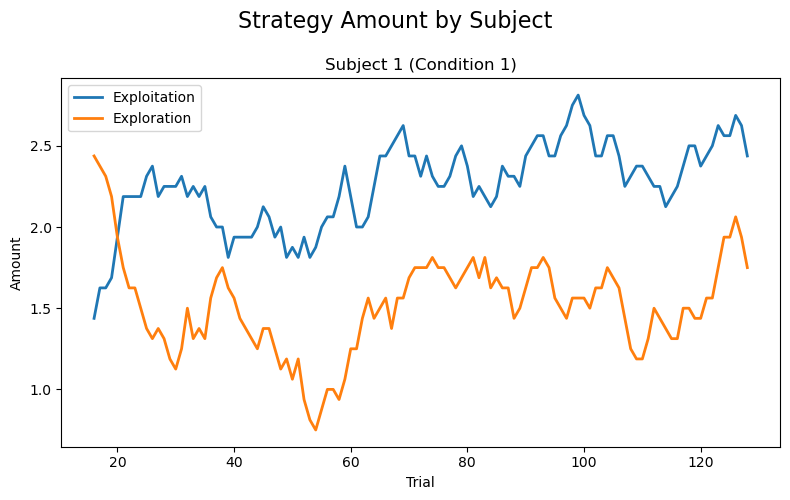

In [13]:
model_eval.plot_cluster_amount(results, 16, [iSub])